<a href="https://colab.research.google.com/github/amannayak/Advance-Data-Mining/blob/master/Retried_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data# 

Audio files data set given by https://zenodo.org/record/1188976

Data Source Page : https://smartlaboratory.org/ravdess


Labels : Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics:

Filename identifiers 

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
Vocal channel (01 = speech, 02 = song).
Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the ‘neutral’ emotion.
Statement (01 = “Kids are talking by the door”, 02 = “Dogs are sitting by the door”).
Repetition (01 = 1st repetition, 02 = 2nd repetition).
Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Preprocess Audio Signal to obtain MFCC images and Y labels from Name of File 

In [11]:
#Import required libraries 

import os
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
from numpy import  asarray


In [6]:
def MFCCImg(fileLoc , MFCC_plot = False):
  """
  Function returns MFCC image for given path which is file location of audio file which is to be read.
  Input : fielLoc : location of file which is to be read 
  Output : Numpy array containing image pixel 
  """

  # load audio file with Librosa
  signal, sample_rate = librosa.load(fileLoc, sr=22050)

  # FFT -> power spectrum
  # perform Fourier transform
  fft = np.fft.fft(signal)

  # calculate abs values on complex numbers to get magnitude
  spectrum = np.abs(fft)

  # create frequency variable
  f = np.linspace(0, sample_rate, len(spectrum))

  # take half of the spectrum and frequency
  left_spectrum = spectrum[:int(len(spectrum)/2)]
  left_f = f[:int(len(spectrum)/2)]

  # STFT -> spectrogram
  hop_length = 512 # in num. of samples
  n_fft = 2048 # window in num. of samples

  # calculate duration hop length and window in seconds
  hop_length_duration = float(hop_length)/sample_rate
  n_fft_duration = float(n_fft)/sample_rate

  # perform stft
  stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

  # calculate abs values on complex numbers to get magnitude
  spectrogram = np.abs(stft)

  # apply logarithm to cast amplitude to Decibels
  log_spectrogram = librosa.amplitude_to_db(spectrogram)

  # MFCCs
  # extract 13 MFCCs
  MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
  if MFCC_plot == True:
    return MFCCs , sample_rate , hop_length
  else:
    return MFCCs

In [12]:
#Calling MFCCImg function to create XLabels 

#creating np array to store images 
#during dry run it can be seen that dimension of single image is 13*189
#this could be handelled to auto create size of np array but currently in this version going with 
#hard coded values 
# total num of records = 1012 

#MFCC_plot = False
MFCC_plot = True #Keep it to Flase if plot is not required 

X = []
if MFCC_plot == True :
  sample_rate = []
  hop_length = []

fileNames = [] #created so that in future we can fecth Y label i.e. emotion from data 

for path, subdirs, files in os.walk(r'/content/drive/My Drive/Colab Notebooks/AudioData'):
    for indx , filename in enumerate(files):
      fileLoc = path+ "/" +filename

      if MFCC_plot == True:
        Data , sr , hop_len = MFCCImg(fileLoc , MFCC_plot = True) # saving image pixels in 3 D np array
        X.append(asarray(Data))
        sample_rate.append(sr)
        hop_length.append(hop_len)
      else: 
        Xlabes[:,:,indx] = MFCCImg(fileLoc) # saving image pixels in 3 D np array

      fileNames.append(filename)
      

In [17]:
#Labels 
Y = [int(emotions[7]) for emotions in fileNames]

MFCC images for Different Emotion

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful)

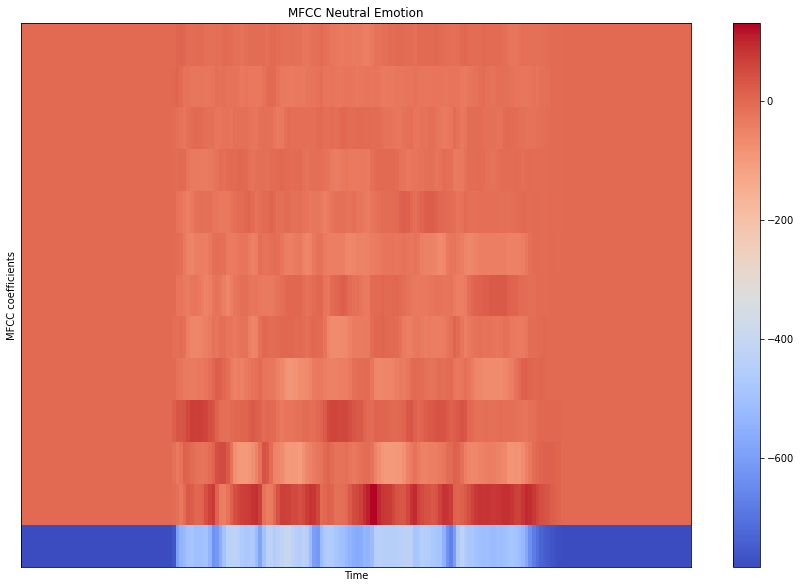

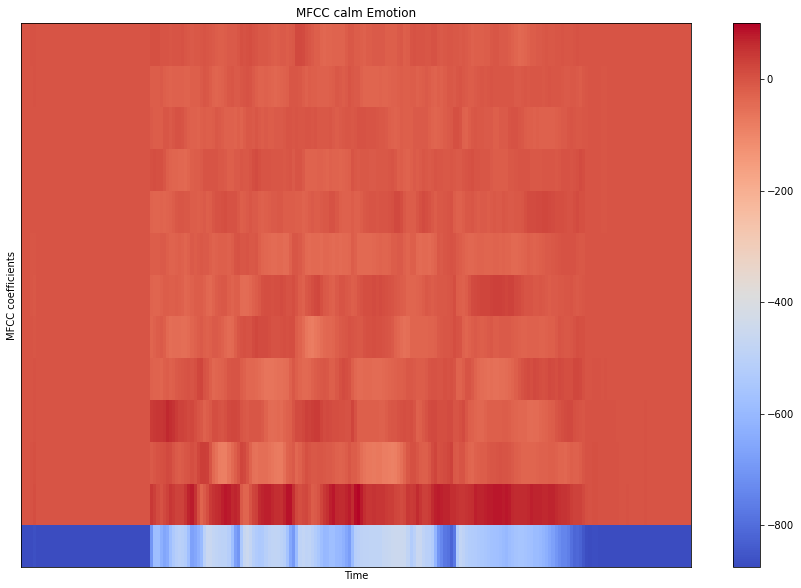

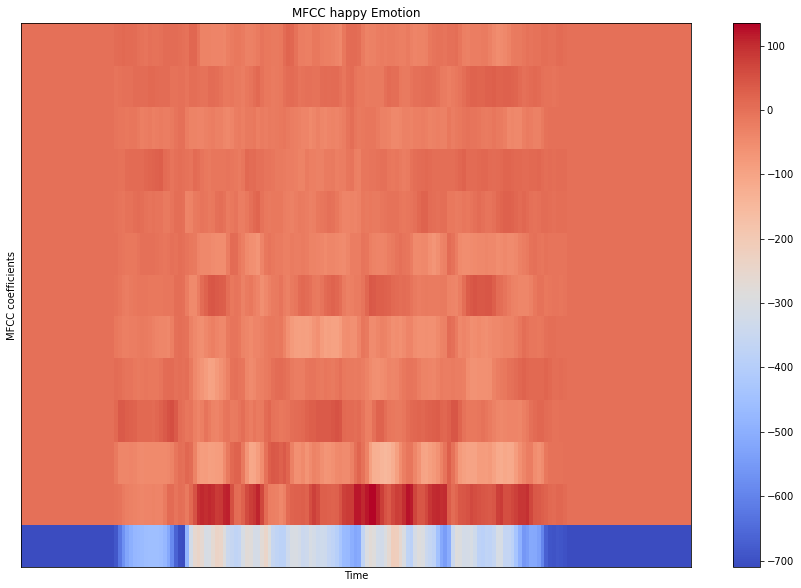

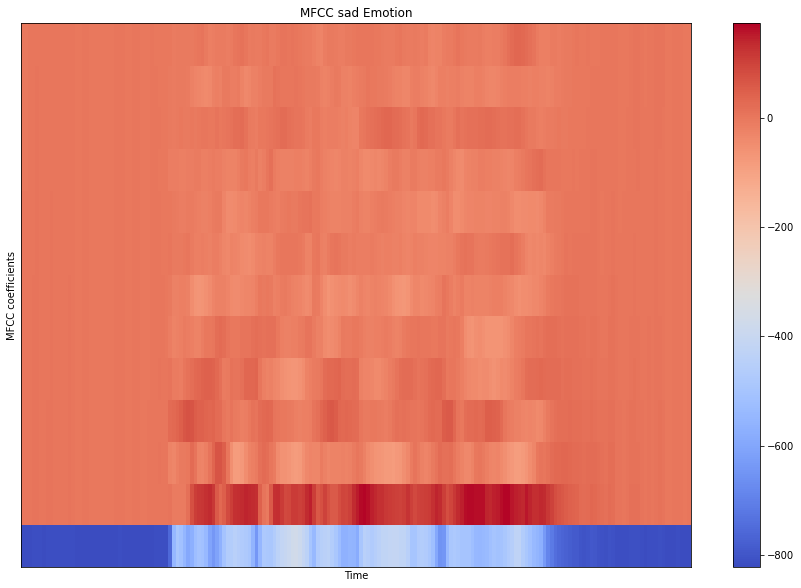

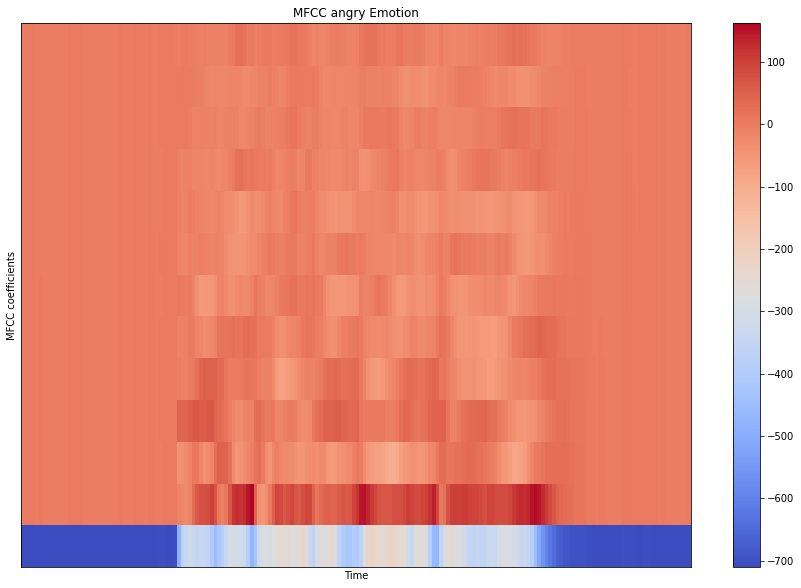

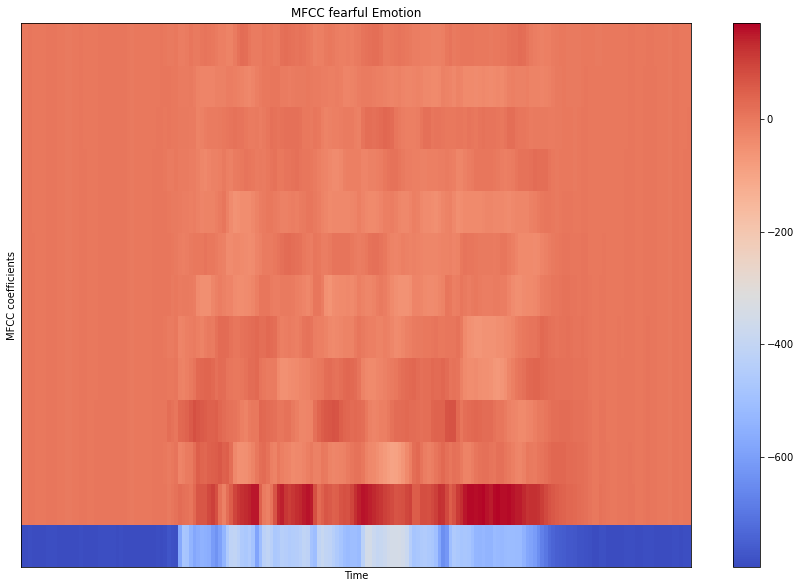

In [14]:
if(MFCC_plot == True):    
  #Skiping plot for now as PreProcessing Function need to be re-executed
 # FIG_SIZE = (15,10)
  plt.figure(figsize=FIG_SIZE)
  librosa.display.specshow(X[20], sr=sample_rate[20], hop_length=hop_length[20])
  plt.xlabel("Time")
  plt.ylabel("MFCC coefficients")
  plt.colorbar()
  plt.title("MFCC Neutral Emotion")

  #FIG_SIZE = (15,10)
  plt.figure(figsize=FIG_SIZE)
  librosa.display.specshow(X[21], sr=sample_rate[21], hop_length=hop_length[21])
  plt.xlabel("Time")
  plt.ylabel("MFCC coefficients")
  plt.colorbar()
  plt.title("MFCC calm Emotion")

  plt.figure(figsize=FIG_SIZE)
  librosa.display.specshow(X[32], sr=sample_rate[32], hop_length=hop_length[32])
  plt.xlabel("Time")
  plt.ylabel("MFCC coefficients")
  plt.colorbar()
  plt.title("MFCC happy Emotion")


  plt.figure(figsize=FIG_SIZE)
  librosa.display.specshow(X[0], sr=sample_rate[0], hop_length=hop_length[0])
  plt.xlabel("Time")
  plt.ylabel("MFCC coefficients")
  plt.colorbar()
  plt.title("MFCC sad Emotion")


  plt.figure(figsize=FIG_SIZE)
  librosa.display.specshow(X[2], sr=sample_rate[2], hop_length=hop_length[2])
  plt.xlabel("Time")
  plt.ylabel("MFCC coefficients")
  plt.colorbar()
  plt.title("MFCC angry Emotion")

  plt.figure(figsize=FIG_SIZE)
  librosa.display.specshow(X[10], sr=sample_rate[10], hop_length=hop_length[10])
  plt.xlabel("Time")
  plt.ylabel("MFCC coefficients")
  plt.colorbar()
  plt.title("MFCC fearful Emotion")



**CNN**

Applying CNN for Audio Classification using our created data.

In [19]:
from sklearn.model_selection import train_test_split
import tensorflow as tf 
import keras as K
#X = np.array(data["mfcc"])
#y = np.array(data["labels"])
#we have preprossed data and X is 
X_train , X_test , Y_train , Y_test = train_test_split(X , Y)

In [30]:
X_train = X_train.astype('float32')

AttributeError: ignored

In [24]:
    # build network topology
    model = K.Sequential([

        # input layer
        K.layers.Flatten(input_shape=(X[1].shape[1], X[1].shape[2])),

        # 1st dense layer
        K.layers.Dense(512, activation='relu'),

        # 2nd dense layer
        K.layers.Dense(256, activation='relu'),

        # 3rd dense layer
        K.layers.Dense(64, activation='relu'),

        # output layer
        K.layers.Dense(10, activation='softmax')
    ])

IndexError: ignored